In [1]:
import sys, os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

# print(os.listdir("./"))
pd.set_option('display.max_columns', None)

from collections import Counter 
from collections import defaultdict
import itertools


In [2]:
df = pd.read_csv('./survey_results_public.csv')
df.head(5)

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,YearsProgram,YearsCodedJob,YearsCodedJobPast,DeveloperType,WebDeveloperType,MobileDeveloperType,NonDeveloperType,CareerSatisfaction,JobSatisfaction,ExCoderReturn,ExCoderNotForMe,ExCoderBalance,ExCoder10Years,ExCoderBelonged,ExCoderSkills,ExCoderWillNotCode,ExCoderActive,PronounceGIF,ProblemSolving,BuildingThings,LearningNewTech,BoringDetails,JobSecurity,DiversityImportant,AnnoyingUI,FriendsDevelopers,RightWrongWay,UnderstandComputers,SeriousWork,InvestTimeTools,WorkPayCare,KinshipDevelopers,ChallengeMyself,CompetePeers,ChangeWorld,JobSeekingStatus,HoursPerWeek,LastNewJob,AssessJobIndustry,AssessJobRole,AssessJobExp,AssessJobDept,AssessJobTech,AssessJobProjects,AssessJobCompensation,AssessJobOffice,AssessJobCommute,AssessJobRemote,AssessJobLeaders,AssessJobProfDevel,AssessJobDiversity,AssessJobProduct,AssessJobFinances,ImportantBenefits,ClickyKeys,JobProfile,ResumePrompted,LearnedHiring,ImportantHiringAlgorithms,ImportantHiringTechExp,ImportantHiringCommunication,ImportantHiringOpenSource,ImportantHiringPMExp,ImportantHiringCompanies,ImportantHiringTitles,ImportantHiringEducation,ImportantHiringRep,ImportantHiringGettingThingsDone,Currency,Overpaid,TabsSpaces,EducationImportant,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,CousinEducation,WorkStart,HaveWorkedLanguage,WantWorkLanguage,HaveWorkedFramework,WantWorkFramework,HaveWorkedDatabase,WantWorkDatabase,HaveWorkedPlatform,WantWorkPlatform,IDE,AuditoryEnvironment,Methodology,VersionControl,CheckInCode,ShipIt,OtherPeoplesCode,ProjectManagement,EnjoyDebugging,InTheZone,DifficultCommunication,CollaborateRemote,MetricAssess,EquipmentSatisfiedMonitors,EquipmentSatisfiedCPU,EquipmentSatisfiedRAM,EquipmentSatisfiedStorage,EquipmentSatisfiedRW,InfluenceInternet,InfluenceWorkstation,InfluenceHardware,InfluenceServers,InfluenceTechStack,InfluenceDeptTech,InfluenceVizTools,InfluenceDatabase,InfluenceCloud,InfluenceConsultants,InfluenceRecruitment,InfluenceCommunication,StackOverflowDescribes,StackOverflowSatisfaction,StackOverflowDevices,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat,StackOverflowAdsRelevant,StackOverflowAdsDistracting,StackOverflowModeration,StackOverflowCommunity,StackOverflowHelpful,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,2 to 3 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"With a soft ""g,"" like ""jiff""",Strongly agree,Strongly agree,Agree,Disagree,Strongly agree,Agree,Agree,Disagree,Somewhat agree,Disagree,Strongly agree,Strongly agree,Strongly disagree,Agree,Agree,Disagree,Agree,"I'm not actively looking, but I am open to new...",0.0,Not applicable/ never,Very important,Very important,Important,Very important,Very important,Very important,Important,Very important,Very important,Very important,Very important,Very important,Somewhat important,Not very important,Somewhat important,Stock options; Vacation/days off; Remote options,Yes,Other,NaN,NaN,Important,Important,Important,Somewhat important,Important,Not very important,Not very important,Not at all important,Somewhat important,Very important,NaN,NaN,Tabs,NaN,Online course; Open source contributions,NaN,NaN,NaN,6:00 AM,Swift,Swift,NaN,NaN,NaN,NaN,iOS,iOS,Atom; Xcode,Turn on some music,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat satisfied,Not very satisfied,Not at all satisfied,Very satisfied,Satisfied,Not very satisfied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have created a CV or Developer Story on Stac...,9.0,Desktop; iOS app,At leas

In [4]:
df.shape

(19102, 154)

In [2]:
schDf = pd.read_csv('./survey_results_schema.csv')
schDf.head(10)

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to ope...
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree..."
5,EmploymentStatus,Which of the following best describes your cur...
6,FormalEducation,Which of the following best describes the high...
7,MajorUndergrad,Which of the following best describes your mai...
8,HomeRemote,How often do you work from home or remotely?
9,CompanySize,"In terms of the number of employees, how large..."


In [8]:
schDf.shape

(154, 2)

In [9]:
df.describe()

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
count,19102.000000,16102.000000,15253.000000,7721.000000,13452.000000,5009.000000,818.000000
mean,9551.500000,7.343932,7.000721,3.685922,8.357865,58341.398571,32231.521687
std,5514.416757,1.919330,2.128648,7.330691,1.405546,40753.384986,28543.877274
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4776.250000,6.000000,6.000000,0.000000,8.000000,27956.989247,4716.459735
50%,9551.500000,8.000000,7.000000,1.000000,8.000000,51612.903226,29784.946237
75%,14326.750000,9.000000,8.000000,3.000000,9.000000,83333.333333,50000.000000
max,19102.000000,10.000000,10.000000,40.000000,10.000000,195000.000000,120000.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19102 entries, 0 to 19101
Columns: 154 entries, Respondent to ExpectedSalary
dtypes: float64(6), int64(1), object(147)
memory usage: 22.4+ MB


In [11]:
schDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 2 columns):
Column      154 non-null object
Question    154 non-null object
dtypes: object(2)
memory usage: 2.5+ KB


# What profession has more promising income & the average developer salary?

In [4]:
from collections import Counter 
from collections import defaultdict

def unqList(df, col):
    givenList = df[col].dropna().tolist()
    givenString = '; '.join(givenList)
    
    givenString = givenString.split("; ")
    
    for i in range(0, len(givenString)): 
        givenString[i] = "".join(givenString[i]) 

    List = "; ".join(Counter(givenString).keys()).split("; ")
    
    return List

In [5]:
developerTypes = unqList(df, 'DeveloperType')
roleExpDF=defaultdict(dict)
roleDF=defaultdict(dict)

yearsProgram = unqList(df, 'YearsCodedJob')
        
targ=df[['DeveloperType', 'YearsCodedJob', 'Salary']].dropna().reset_index()

for dVal in developerTypes:
    
    roleDF[dVal]={}
    roleDF[dVal]['Salary'] =0
    roleDF[dVal]['Count'] =0
    roleDF[dVal]['Avg'] =0
    for pVal in yearsProgram:
        if pVal=='Less than a year':
            yVal = 1
        elif pVal=='20 or more years':
            yVal = 20
        else:
            yVal = int(pVal[-8:][:2].strip())
            
        roleExpDF[(dVal,yVal)]={}
        roleExpDF[(dVal,yVal)]['Salary'] =0
        roleExpDF[(dVal,yVal)]['Count'] =0
        roleExpDF[(dVal,yVal)]['Avg'] =0
        for i in range(targ.shape[0]):
            if pVal in targ['YearsCodedJob'][i]:
                if dVal in targ['DeveloperType'][i]:

                        roleExpDF[(dVal,yVal)]['Salary'] += targ['Salary'][i]
                        roleExpDF[(dVal,yVal)]['Count'] += int(1)
                        roleExpDF[(dVal,yVal)]['Avg'] =round(roleExpDF[(dVal,yVal)]['Salary']/roleExpDF[(dVal,yVal)]['Count'],2)

                        roleDF[dVal]['Salary'] += targ['Salary'][i]
                        roleDF[dVal]['Count'] += int(1)
                        roleDF[dVal]['Avg'] =round(roleDF[dVal]['Salary']/roleDF[dVal]['Count'],2)


In [127]:
roleDf = pd.DataFrame(roleDF).transpose().dropna().drop('Other')
roleDf[["Avg"]].sort_values("Avg", ascending=False)
roleDf.columns = ['average_salary', "count", "salary"]
roleDf

,average_salary,count,salary
Mobile developer,52554.05,974.0,5.118765e+07
Graphics programming,56036.01,176.0,9.862337e+06
Desktop applications developer,57607.05,1378.0,7.938251e+07
Web developer,56808.53,3650.0,2.073511e+08
Embedded applications/devices developer,58956.91,401.0,2.364172e+07
DevOps specialist,70498.70,596.0,4.201722e+07
Quality assurance engineer,59536.70,164.0,9.764018e+06
Data scientist,65442.62,341.0,2.231593e+07
Machine learning specialist,69067.55,153.0,1.056733e+07
Developer with a statistics or mathematics background,63968.01,513.0,3.281559e+07


Text(0,0.5,'average salary')

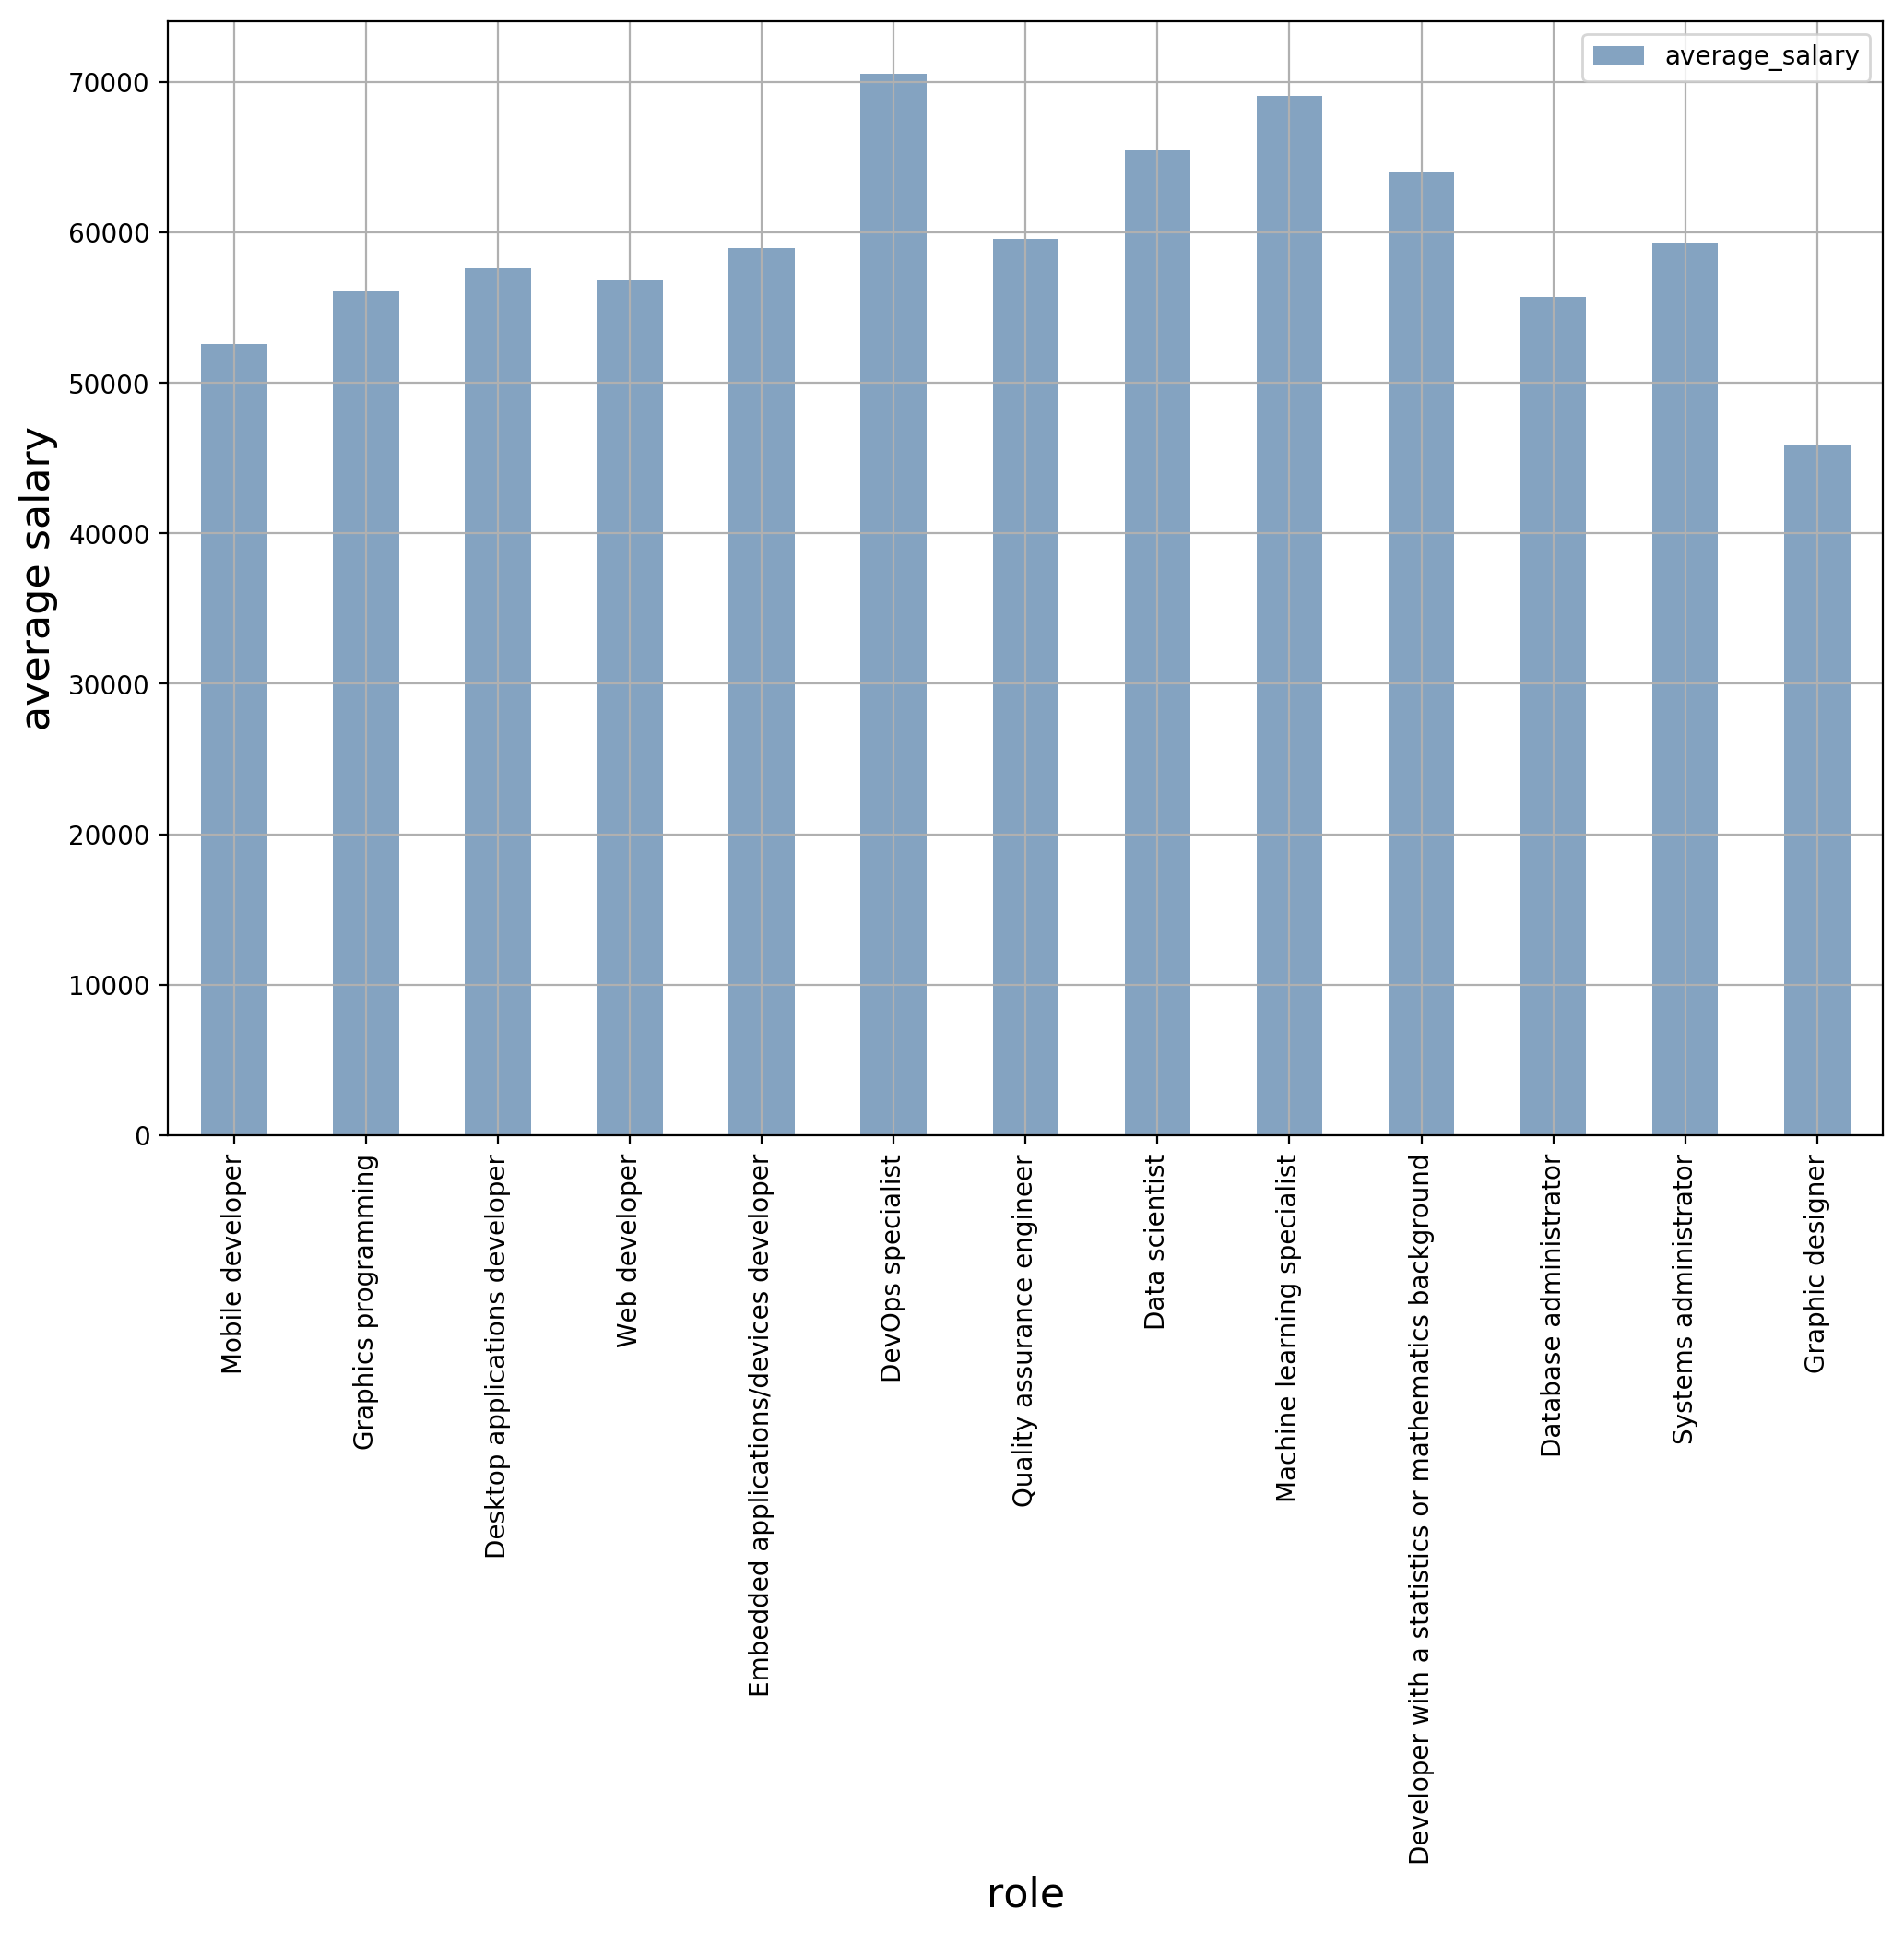

In [128]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 200

ax = roleDf.plot.bar(y='average_salary', color=(0.2, 0.4, 0.6, 0.6)).grid(True)

plt.xlabel('role', fontsize=16)
plt.ylabel('average salary', fontsize=16)



In [109]:
aggDf = pd.DataFrame([roleExpDF[i] for i in sorted(roleExpDF)], index=pd.MultiIndex.from_tuples([i for i in sorted(roleExpDF.keys())])) 
aggDf=aggDf.reset_index()
aggDf.columns=["role","experience","avg","cnt","salary"]

aggDf[(aggDf.avg != 0)].sort_values("avg",ascending=False).head(10)

,role,experience,avg,cnt,salary
132,Graphic designer,13,150000.00,1,1.500000e+05
173,Machine learning specialist,14,135666.67,3,4.070000e+05
177,Machine learning specialist,18,133625.34,2,2.672507e+05
179,Machine learning specialist,20,132800.00,2,2.656000e+05
19,Data scientist,20,132800.00,2,2.656000e+05
119,Embedded applications/devices developer,20,124750.00,2,2.495000e+05
152,Graphics programming,13,122500.00,2,2.450000e+05
215,Other,16,109650.27,8,8.772021e+05
232,Quality assurance engineer,13,105232.97,3,3.156989e+05
197,Mobile developer,18,104984.87,15,1.574773e+06


In [111]:
aggDf = aggDf[(aggDf.avg != 0) & (aggDf.role != 'Other')][["role","experience","avg"]]

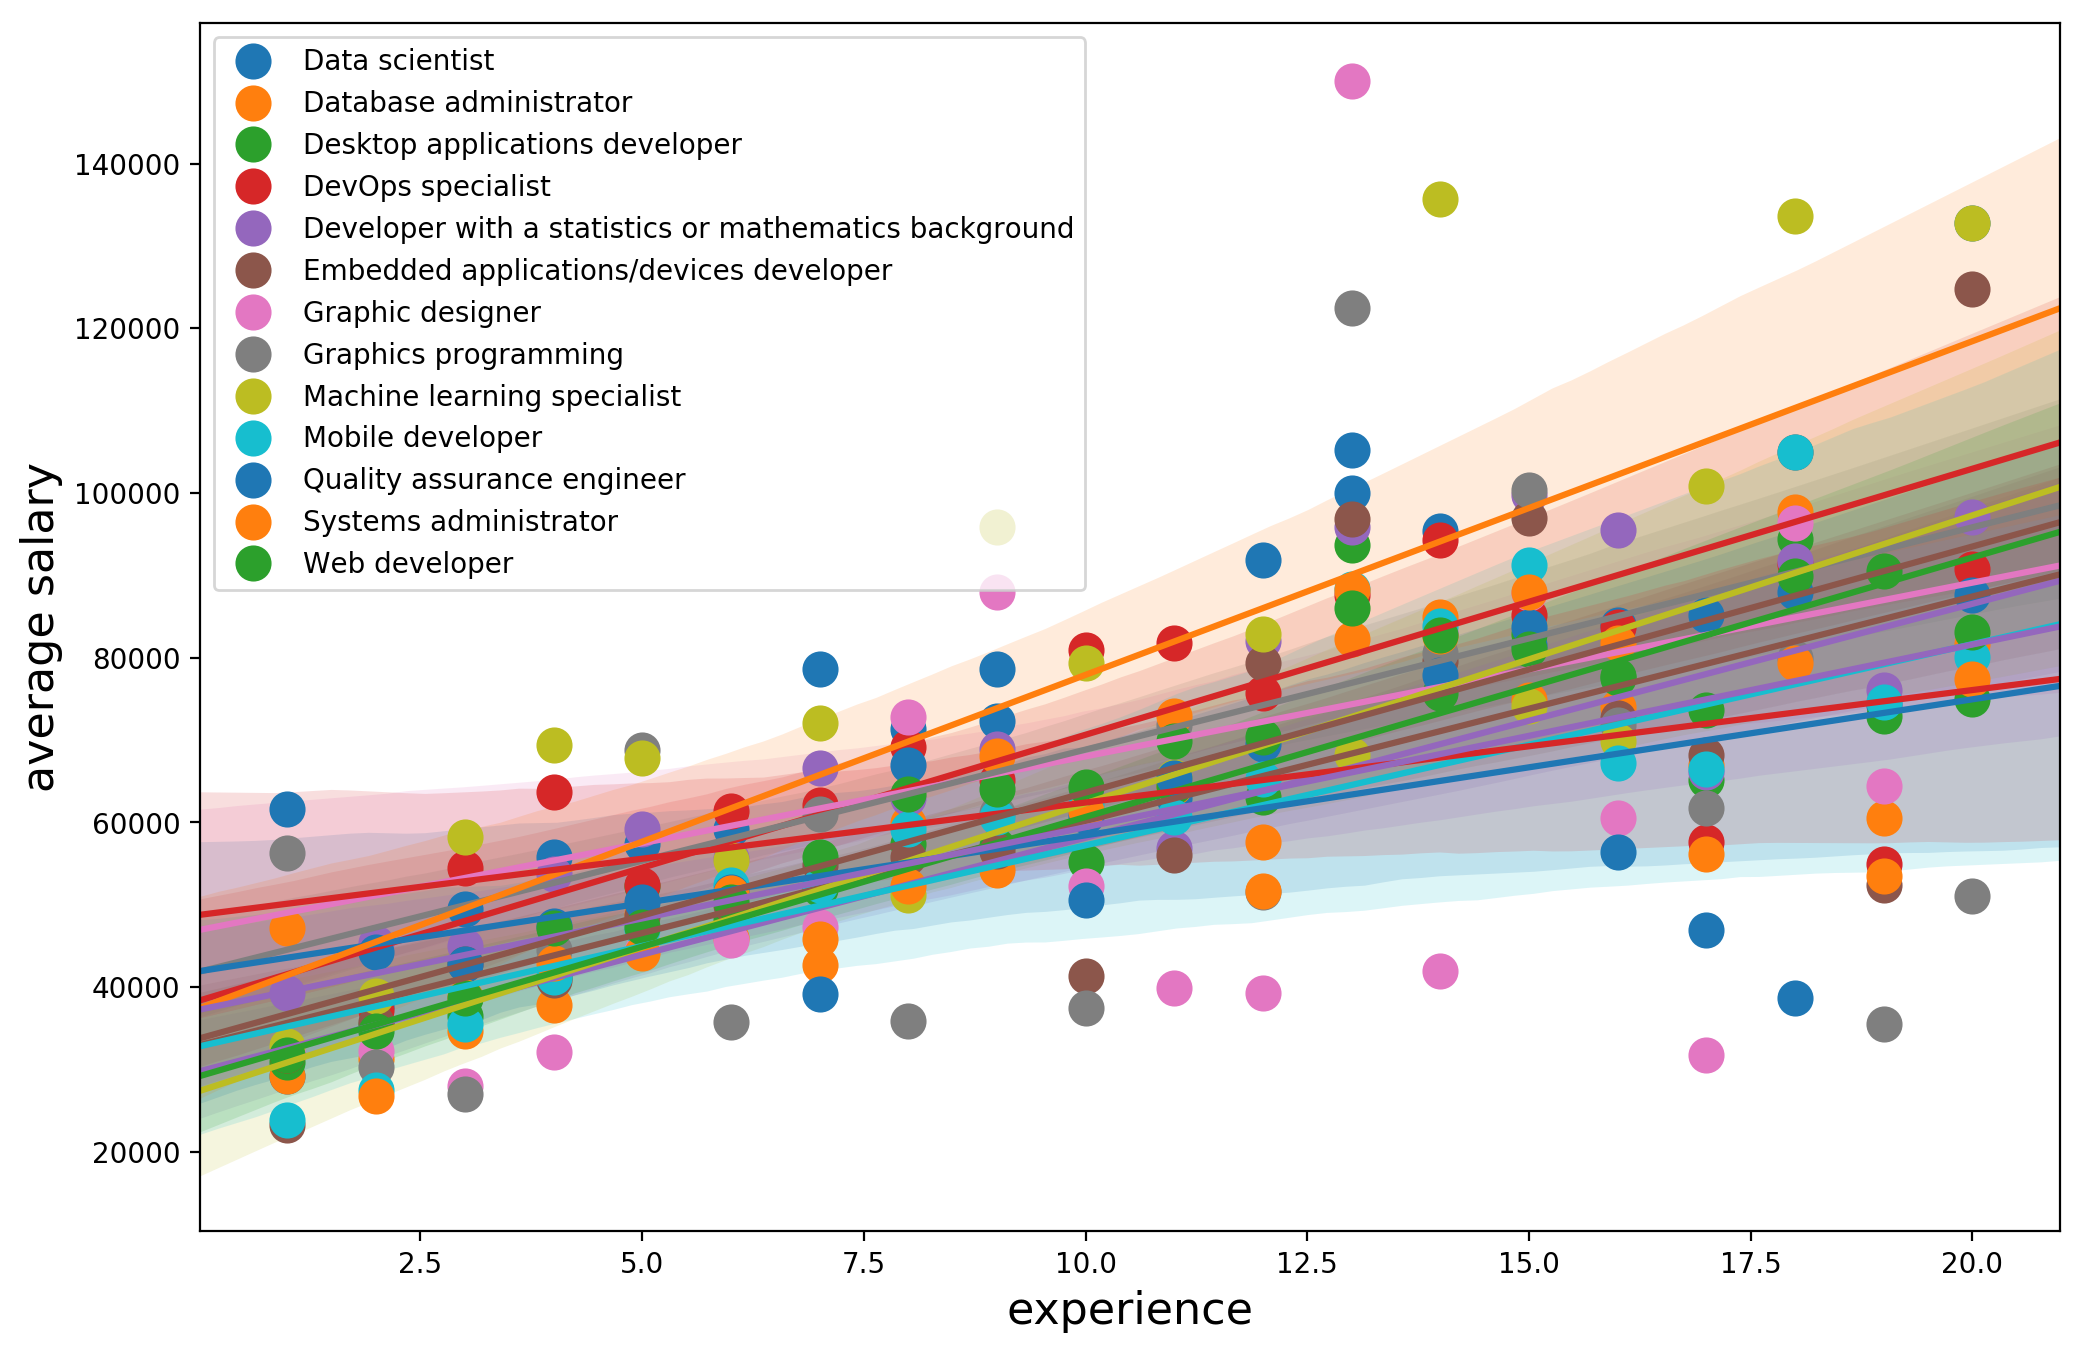

In [135]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 200

groups = aggDf.groupby('role')

fig, ax = plt.subplots()
ax.margins(0.05) 
for name, group in groups:
    ax.plot(group.experience, group.avg, marker='o', linestyle='', ms=12, label=name)
    
for name, group in groups:
    sns.regplot(group.experience, group.avg)

ax.legend()
plt.xlabel('experience', fontsize=16)
plt.ylabel('average salary', fontsize=16)
plt.show()


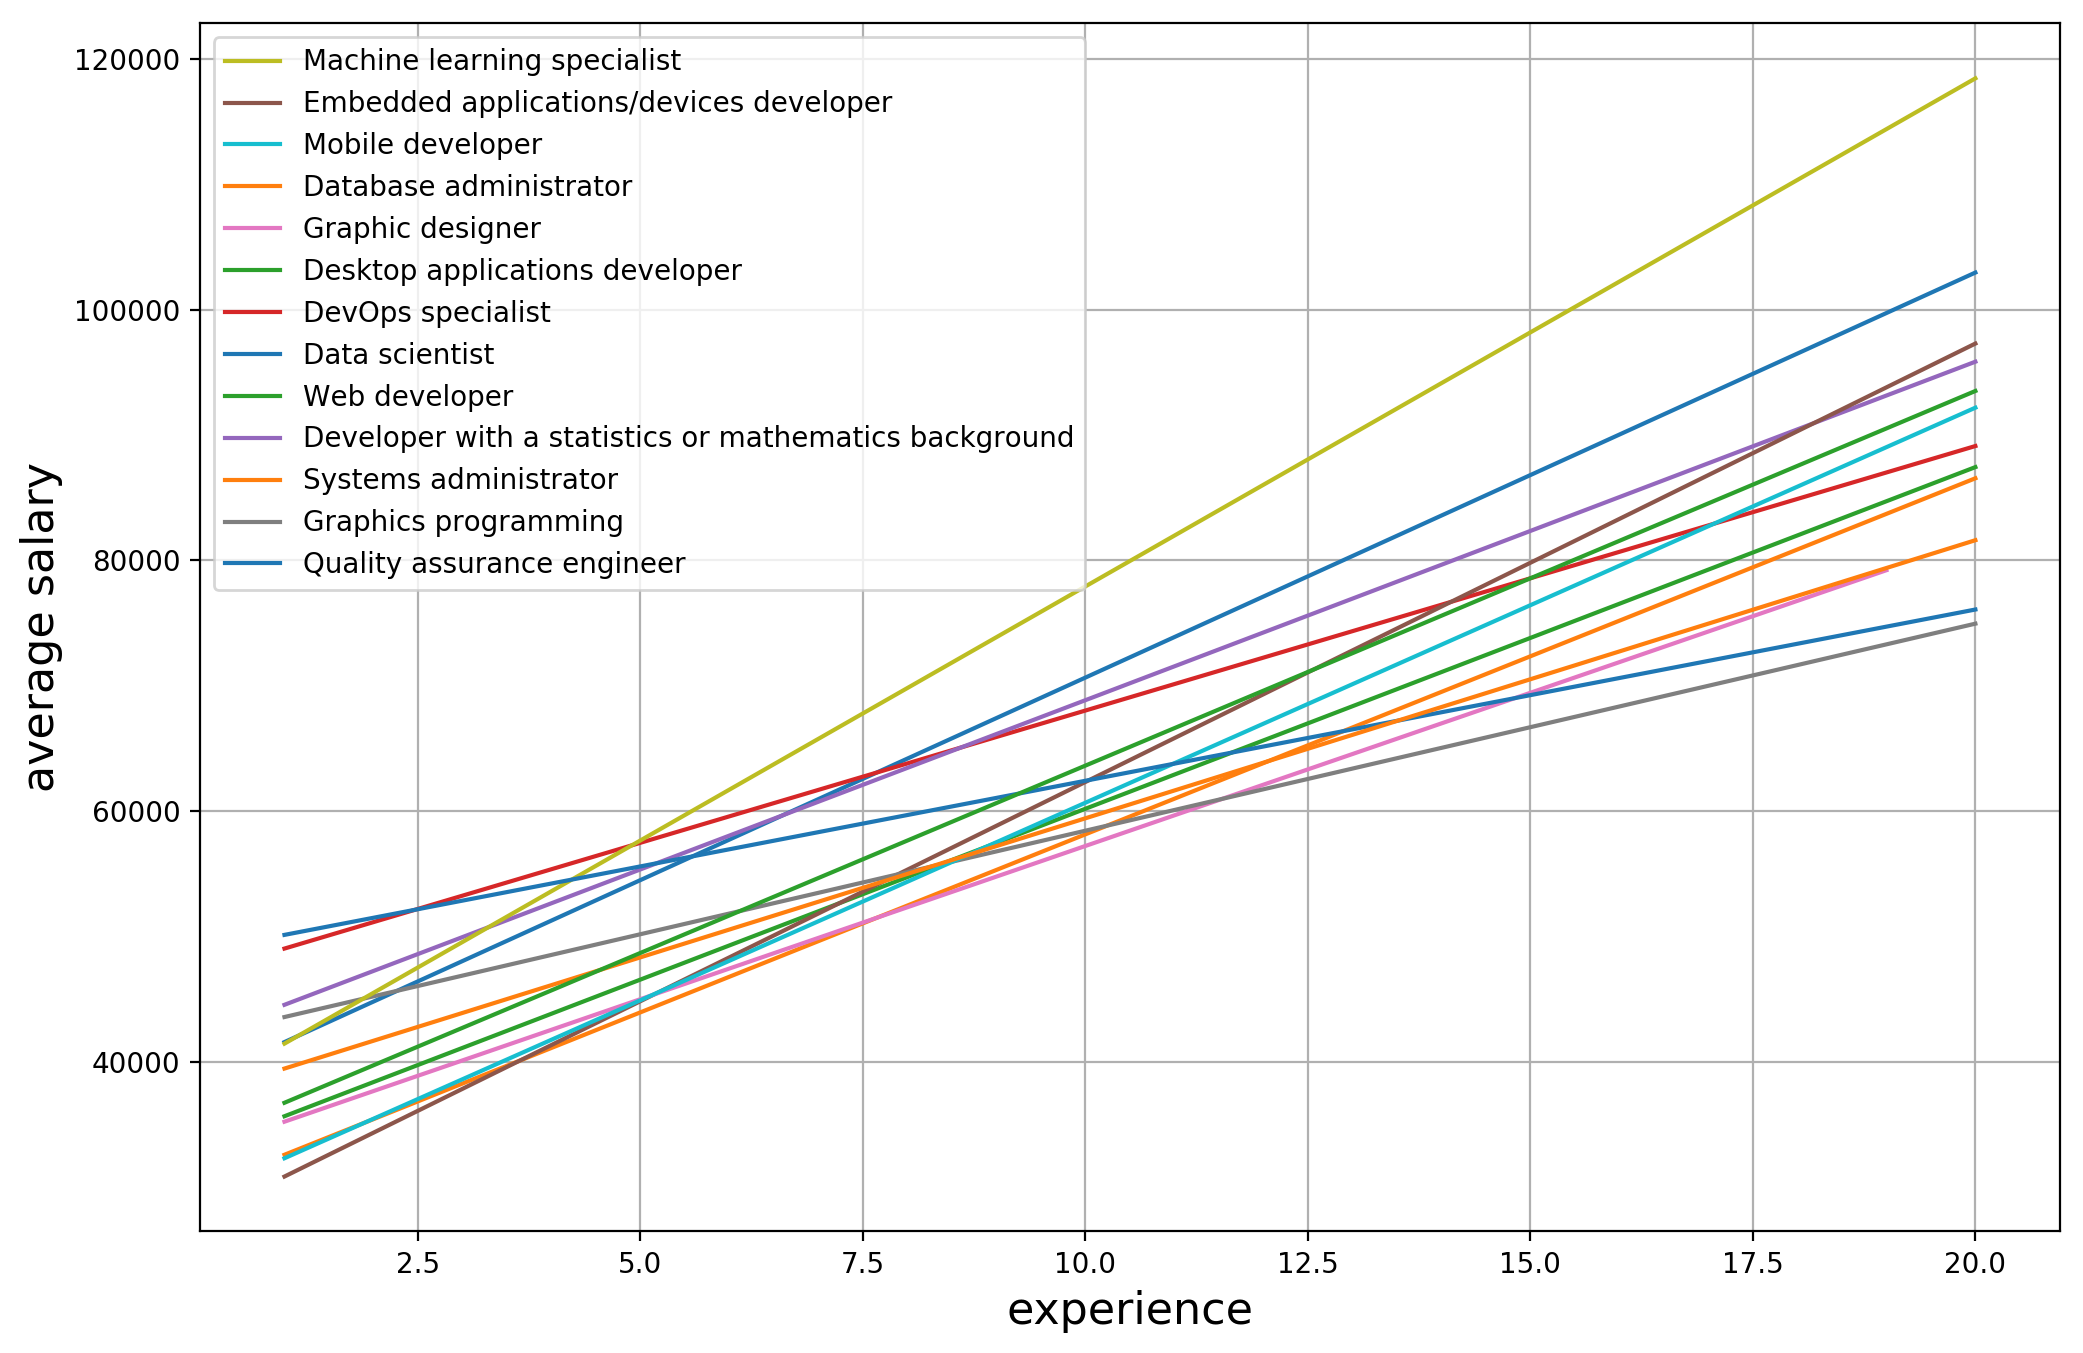

In [123]:
fig,ax = plt.subplots(1)

for name, group in groups:

    ax.plot(np.unique(group.experience), np.poly1d(np.polyfit(group.experience, group.avg, 1))(np.unique(group.experience)),label=name)

handles,labels = ax.get_legend_handles_labels()

slopes={}

for l in labels:
    slpDf = aggDf[(aggDf.role==l)&((aggDf.experience==1)|(aggDf.experience==18))][['avg']]
    start = slpDf.values[0][0]
    end = slpDf.values[1][0]
    slopes[l] = round((end-start)/18)*-1
    
slopeList = sorted(slopes, key=slopes.get)
slopeList

new_handles=[]
new_labels=[]

for s in range(len(slopeList)):
    if slopeList[s] != 'Other':
        idx = labels.index(slopeList[s])
        new_handles.append(handles[idx])
        new_labels.append(labels[idx])

labels = new_labels
handles = new_handles
    
ax.legend(handles, labels, loc='best')
plt.grid(True)
plt.xlabel('experience', fontsize=16)
plt.ylabel('average salary', fontsize=16)
plt.show()
